In [2]:
import numpy as np

#specify dimensions header
nx, ny, nz, nframes = 100,100,100,1
header = np.array([nx,ny,nz,nframes])

#create simple distance to origin texture
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
z = np.linspace(-1,1,nz)
zz,yy,xx = np.meshgrid(z,y,x,indexing='ij')
pointdata = yy.flatten()**2+zz.flatten()**2+xx.flatten()**2

#open and write to file
binfile = open('test1.bvox','wb')
header.astype('<i4').tofile(binfile)
pointdata.astype('<f4').tofile(binfile)

In [28]:
events = []
with open('/home/ahagen/mcnp/active/clinac_no_target_10x10_source.out') as f:
    lines_iter = f  # If z is a file, lines_iter = z works
    for event in zip(lines_iter, lines_iter, lines_iter):
        blank_line = event[0]
        line_two = event[1]
        line_three = event[2]
        line_two_arr = [float(_x) for _x in line_two.split()]
        zaid = line_two_arr[2]
        x = line_two_arr[4]
        y = line_two_arr[5]
        z = line_two_arr[6]
        E = line_two_arr[-1]
        events.extend([{'zaid': zaid, 'E': E, 'pos': (x, y, z)}])
        

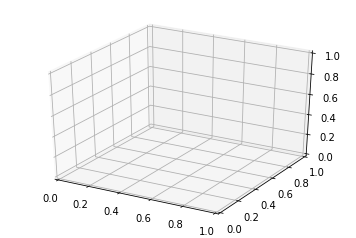

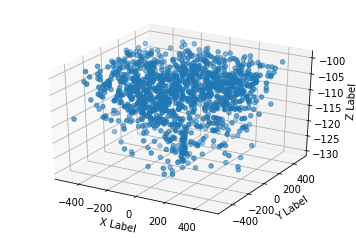

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [51]:
from scipy import stats
xs = [_x['pos'][0] for _x in events]
ys = [_y['pos'][1] for _y in events]
zs = [_z['pos'][2] for _z in events]
Es = [_E['E'] for _E in events]
zaids = [_zaid['zaid'] for _zaid in events]
xmin = np.min(xs)
xmax = np.max(xs)
ymin = np.min(ys)
ymax = np.max(ys)
zmin = np.min(zs)
zmax = np.max(zs)
print xmin, xmax, ymin, ymax, zmin, zmax
xmin = -500.
xmax = 500.
ymin = -500.
ymax = 500.
zmin = -130.
zmax = -100.
X, Y, Z = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:30j]
positions = np.vstack([X.ravel(), Y.ravel(), Z.ravel()])
values = np.vstack([xs, ys, zs])
kernel = stats.gaussian_kde(values)
phi = np.reshape(kernel(positions).T, X.shape)
#pointdata = np.log(phi)
pointdata = pointdata - np.min(pointdata)
pointdata = pointdata / np.max(pointdata)
print np.max(pointdata), np.min(pointdata)
print pointdata[:5,:5, :5]
#open and write to file
nx, ny, nz = pointdata.shape
header = np.array([nz,ny,nx,nframes])
binfile = open('test1.bvox','wb')
header.astype('<i4').tofile(binfile)
pointdata.astype('<f8').tofile(binfile)

-498.4 484.49 -499.92 498.96 -129.57 -100.0
1.0 0.0
[[[ 0.00126387  0.15850038  0.30210836  0.43209398  0.54846399]
  [ 0.00123501  0.15847428  0.30208494  0.43207317  0.5484458 ]
  [ 0.00120199  0.15844408  0.30205747  0.43204838  0.54842369]
  [ 0.00116481  0.15840977  0.30202594  0.4320196   0.54839765]
  [ 0.00112347  0.15837134  0.30199035  0.4319868   0.54836766]]

 [[ 0.00137165  0.15860223  0.3022043   0.43218405  0.54854826]
  [ 0.00134272  0.15857607  0.30218082  0.43216319  0.54853002]
  [ 0.00130964  0.15854581  0.30215329  0.43213835  0.54850786]
  [ 0.0012724   0.15851143  0.30212171  0.43210951  0.54848176]
  [ 0.00123098  0.15847294  0.30208606  0.43207665  0.54845172]]

 [[ 0.0014743   0.15869895  0.30229512  0.43226901  0.54862743]
  [ 0.00144531  0.15867273  0.30227159  0.4322481   0.54860913]
  [ 0.00141216  0.15864241  0.302244    0.4322232   0.54858692]
  [ 0.00137486  0.15860798  0.30221236  0.4321943   0.54856077]
  [ 0.00133338  0.15856942  0.30217665  0.432161

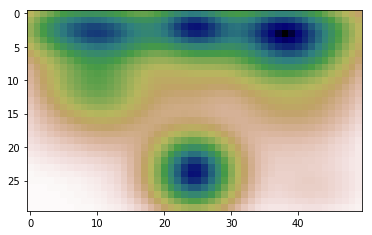

In [75]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(phi[:, 25, :]), cmap=plt.cm.gist_earth_r)
#ax.plot(m1, m2, 'k.', markersize=2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
plt.show()

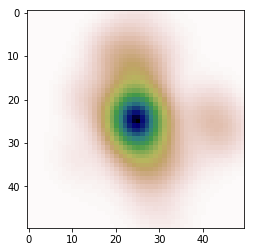

In [77]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(phi[:, :, 0]), cmap=plt.cm.gist_earth_r)
#ax.plot(m1, m2, 'k.', markersize=2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
plt.show()

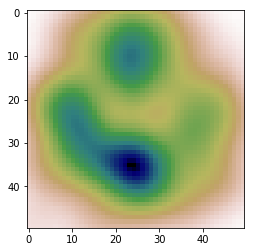

In [78]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(phi[:, :, 15]), cmap=plt.cm.gist_earth_r)
#ax.plot(m1, m2, 'k.', markersize=2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
plt.show()